# Importing Libraries

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Visualizing Dataset

In [3]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

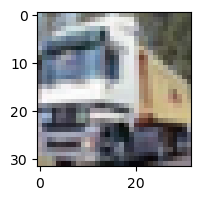

In [7]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

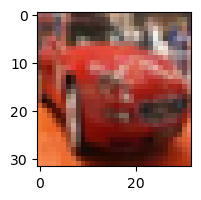

In [8]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[5])

# Preprocessing Dataset

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
y_data = to_categorical(y_train)
y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [13]:
x_train.max()

255

In [14]:
x_train.min()

0

# Normalization

In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [16]:
x_train[49000]

array([[[0.67058824, 0.73333333, 0.83921569],
        [0.6627451 , 0.73333333, 0.83921569],
        [0.65882353, 0.73333333, 0.83921569],
        ...,
        [0.71764706, 0.76078431, 0.83137255],
        [0.70588235, 0.74509804, 0.81960784],
        [0.70980392, 0.75294118, 0.82352941]],

       [[0.66666667, 0.72156863, 0.82745098],
        [0.65882353, 0.72156863, 0.82352941],
        [0.65490196, 0.7254902 , 0.82352941],
        ...,
        [0.72941176, 0.74509804, 0.82352941],
        [0.71372549, 0.74117647, 0.81568627],
        [0.70588235, 0.74509804, 0.81960784]],

       [[0.67058824, 0.7254902 , 0.82745098],
        [0.65882353, 0.72156863, 0.81960784],
        [0.65882353, 0.7254902 , 0.82352941],
        ...,
        [0.71372549, 0.74117647, 0.81960784],
        [0.70588235, 0.7372549 , 0.81176471],
        [0.70196078, 0.74509804, 0.81568627]],

       ...,

       [[0.44313725, 0.52156863, 0.58431373],
        [0.45098039, 0.52941176, 0.59215686],
        [0.45882353, 0

<Figure size 1500x200 with 0 Axes>

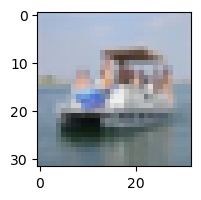

In [18]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[49000])

# Modelling 

In [26]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers

In [33]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)


Epoch 1/5


1563/1563 [==============================] - 90s 57ms/step - loss: 1.8091 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.6232 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5383 - accuracy: 0.4573
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4821 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4321 - accuracy: 0.4951


In [35]:
import numpy as np 
pre=ann.predict(x_test)
pred=np.argmax(pre,axis=1)
pred

313/313 [==============================] - 6s 19ms/step


array([3, 8, 8, ..., 3, 6, 7], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.4748

In [37]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), input_shape=(32,32,3), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(100, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [41]:
model.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 47s 28ms/step - loss: 0.7389 - accuracy: 0.7427
Epoch 2/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6844 - accuracy: 0.7608
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6399 - accuracy: 0.7775
Epoch 4/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.5903 - accuracy: 0.7944
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.5484 - accuracy: 0.8083


In [43]:
result=model.predict(x_test)
res=np.argmax(result,axis=1)
res

313/313 [==============================] - 5s 14ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [44]:
accuracy_score(res,y_test)

0.695

In [45]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_27 (Dense)            (None, 100)              

In [47]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9610 - accuracy: 0.6950


[0.9610173106193542, 0.6949999928474426]

# Classification

In [48]:
from sklearn.metrics import classification_report

In [50]:
report = classification_report(y_test, res)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1000
           1       0.87      0.77      0.81      1000
           2       0.61      0.59      0.60      1000
           3       0.47      0.52      0.49      1000
           4       0.63      0.69      0.66      1000
           5       0.56      0.62      0.59      1000
           6       0.71      0.83      0.76      1000
           7       0.82      0.67      0.74      1000
           8       0.83      0.77      0.80      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.69      0.70     10000

